Задача

1) посчитать явку по районам, по городу - подсветить аномальные округа :)

2) посчитать сколько голосов набрала единая россия

3) посчитать сколько стоить голосов один мандат в городской думе - вот сколько каждый совет выбирает депутатов в гордуму

1. Куйбышевский 25 депутатов / 3 депутата
2. Самарский 20 депутатов / 2 депутата
3. Ленинский 20 депутатов / 2 депутата
4. Железнодорожный 20 депутатов / 3 депутата
5. Октябрьский 25 депутатов / 4 депутата
6. Советский район 25 депутатов / 5 депутатов
7. Промышленный район 25 депутатов / 8 депутатов
8. Кировский район 25 депутатов / 7 депутатов
9. Красноглинский район 25 депутатов / 3 депутата
4) задача посчитать сколько нужно было набрать голосов, чтобы контролировать самарскую городскую думу. найти минимальное число при котором можно получить 19 мандатов. Скорее всего это по 13 депутатов в Промышленном, Кировском и Октябрьском районе = 8+7+4 (39 депутатов). Но это я так пальцем в небо.

5) Ещё наверное нужно всякие распределения построить

In [2]:
import pandas as pd
import plotly.express as px
import seaborn as sns
from pandas_profiling import ProfileReport

In [3]:
df = pd.read_csv('results_samara_uik_13_09_2020.csv')
df.head()

Район      Округ  Номер УИК  Число избирателей   Явка  \
0  Красноглинского    Седьмой  УИК №2701               1628  18.18   
1  Красноглинского     Шестой  УИК №2702               1556   7.39   
2  Красноглинского  Четвёртый  УИК №2703               1494   9.37   
3  Красноглинского    Девятый  УИК №2704               2355  17.11   
4  Красноглинского    Седьмой  УИК №2705               1409  14.90   

   Действительных бюллетеней  Недействительных бюллетеней  Досрочно  На УИКах  \
0                        296                            0       271        25   
1                        108                            7        76        31   
2                        137                            3        87        53   
3                        397                            6       276       107   
4                        204                            6        76       129   

   На дому                         Победитель  \
0        0  Муравьева Екатерина Александровна   
1        8         Деникаева Наталия Олеговна   
2        0       Анисимова Ирина Владимировна   
3       20           Мотынга Иван Анатольевич   
4        5      Солдатов Алексей Владимирович   

   Число проголосовавших за победителя  Процент победителя Партия победителя  
0                                  242               81.76              ЛДПР  
1                                   71               61.74     Единая Россия  
2                                  120               85.71     Единая Россия  
3                                  354               87.84     Единая Россия  
4                                  104               49.52     Единая Россия

In [3]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

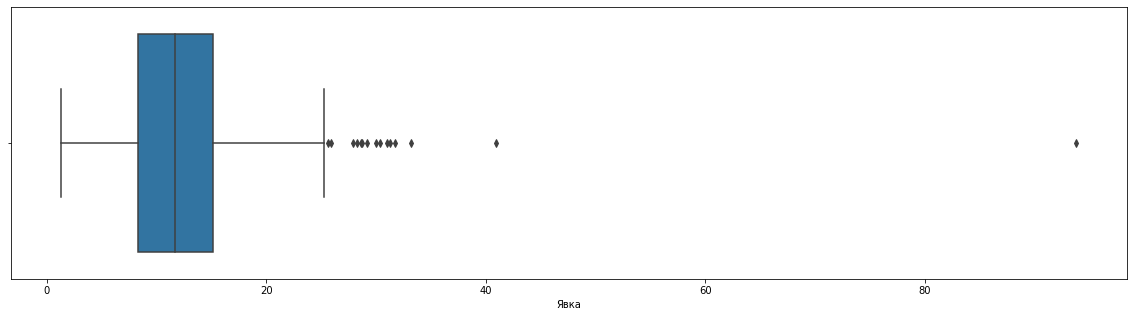

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
sns.boxplot(data=df, x="Явка")

In [9]:
df['Явка'].mean()

12.53183932346723

In [11]:
round(df.groupby('Район').mean()['Явка'], 2)

Район
Железнодорожного    14.90
Кировского          10.59
Красноглинского     14.82
Куйбышевского       17.53
Ленинского          17.06
Октябрьского        14.70
Промышленного        9.65
Самарского          13.49
Советского           9.80
Name: Явка, dtype: float64

In [15]:
IQR = df['Явка'].quantile(0.75)-df['Явка'].quantile(0.25)
whisker = 1.5*IQR
up_whisker = whisker+df['Явка'].quantile(0.75)
up_whisker

25.299999999999997

In [16]:
df[df['Явка'] > up_whisker]

Район               Округ  Номер УИК  Число избирателей  \
13    Красноглинского         Тринадцатый  УИК №2714                257   
35    Красноглинского      Двадцать пятый  УИК №2736               1223   
36    Красноглинского     Двадцать третий  УИК №2737               1430   
82       Октябрьского         Тринадцатый  УИК №3031               1732   
188  Железнодорожного              Первый  УИК №2503               1180   
191  Железнодорожного              Третий  УИК №2506               1630   
194  Железнодорожного               Пятый  УИК №2509               1958   
313        Кировского      Двадцать пятый  УИК №2686                 41   
315     Куйбышевского              Первый  УИК №2801                729   
341     Куйбышевского     Двадцать первый  УИК №2827                948   
347     Куйбышевского  Двадцать четвертый  УИК №2833               2320   
355        Ленинского              Третий  УИК №2903               2785   
367        Ленинского         Семнадцатый  УИК №2919               2820   
368        Ленинского         Пятнадцатый  УИК №2920               2445   
369        Ленинского       Восемнадцатый  УИК №2921               2721   

      Явка  Действительных бюллетеней  Недействительных бюллетеней  Досрочно  \
13   93.77                        241                            0       214   
35   40.88                        477                           23       205   
36   30.00                        404                           25       246   
82   33.14                        574                            0       472   
188  31.27                        363                            6       226   
191  27.85                        442                           12       329   
194  28.29                        553                            1       274   
313  31.71                         12                            1         1   
315  31.00                        209                           17       175   
341  28.59                        261                           10       205   
347  25.91                        590                           11       400   
355  29.12                        791                           20       463   
367  28.72                        790                           20       643   
368  25.60                        617                            9       483   
369  30.32                        815                           10       596   

     На УИКах  На дому                       Победитель  \
13         27        0   Легостаев Александр Васильевич   
35        266       29  Новоселец Валентина Григорьевна   
36        162       21      Кузнецов Николай Васильевич   
82         97        5          Дегтев Алексей Петрович   
188       119       24        Кравец Анна Александровна   
191        96       29       Натальчук Михаил Сергеевич   
194       268       12   Маевский Константин Викторович   
313        12        0            Плахин Антон Игоревич   
315        35       16          Ликс Борис Владимирович   
341        42       24      Беляков Сергей Владимирович   
347       116       85      Иванов Александр Николаевич   
355       240      108     Максимов Александр Борисович   
367       157       10      Шулаева Екатерина Романовна   
368       125       18       Нурсафин Денис Рафаэльевич   
369       204       25      Попов Алексей Александрович   

     Число проголосовавших за победителя  Процент победителя Партия победителя  
13                                   237               98.34     Единая Россия  
35                                   382               76.40     Единая Россия  
36                                   270               62.94     Единая Россия  
82                                   521               90.77     Единая Россия  
188                                  305               82.66     Единая Россия  
191                                  357               78.63     Единая Россия  
194                   

In [22]:
for i in df[df['Явка'] > up_whisker][['Номер УИК', 'Явка', 'Район']].values:
    print(i[0], i[1], i[2])

УИК №2714 93.77 Красноглинского
УИК №2736 40.88 Красноглинского
УИК №2737 30.0 Красноглинского
УИК №3031 33.14 Октябрьского
УИК №2503 31.27 Железнодорожного
УИК №2506 27.85 Железнодорожного
УИК №2509 28.29 Железнодорожного
УИК №2686 31.71 Кировского
УИК №2801 31.0 Куйбышевского
УИК №2827 28.59 Куйбышевского
УИК №2833 25.91 Куйбышевского
УИК №2903 29.12 Ленинского
УИК №2919 28.72 Ленинского
УИК №2920 25.6 Ленинского
УИК №2921 30.32 Ленинского


In [7]:
IQR = df['Число проголосовавших за победителя'].quantile(0.75)-df['Число проголосовавших за победителя'].quantile(0.25)
whisker = 1.5*IQR
up_whisker = whisker+df['Число проголосовавших за победителя'].quantile(0.75)
up_whisker

388.5

In [8]:
df[df['Число проголосовавших за победителя'] > up_whisker]

Район               Округ  Номер УИК  Число избирателей  \
52       Октябрьского              Первый  УИК №3001               2475   
80       Октябрьского         Тринадцатый  УИК №3029               2061   
82       Октябрьского         Тринадцатый  УИК №3031               1732   
194  Железнодорожного               Пятый  УИК №2509               1958   
199  Железнодорожного              Шестой  УИК №2514               1974   
214  Железнодорожного       Четырнадцатый  УИК №2529               2198   
340     Куйбышевского           Двадцатый  УИК №2826               2248   
347     Куйбышевского  Двадцать четвертый  УИК №2833               2320   
355        Ленинского              Третий  УИК №2903               2785   
364        Ленинского         Двенадцатый  УИК №2915               2988   
367        Ленинского         Семнадцатый  УИК №2919               2820   
368        Ленинского         Пятнадцатый  УИК №2920               2445   
369        Ленинского       Восемнадцатый  УИК №2921               2721   
370        Ленинского        Шестнадцатый  УИК №2922               2390   

      Явка  Действительных бюллетеней  Недействительных бюллетеней  Досрочно  \
52   25.25                        607                           18       492   
80   23.34                        468                            6       374   
82   33.14                        574                            0       472   
194  28.29                        553                            1       274   
199  25.13                        490                            6       298   
214  22.75                        492                            8       298   
340  21.93                        474                           19       367   
347  25.91                        590                           11       400   
355  29.12                        791                           20       463   
364  23.09                        690                            0       520   
367  28.72                        790                           20       643   
368  25.60                        617                            9       483   
369  30.32                        815                           10       596   
370  22.30                        520                            6       392   

     На УИКах  На дому                       Победитель  \
52        124        9        Сычева Наталья Валерьевна   
80         99        8          Дегтев Алексей Петрович   
82         97        5          Дегтев Алексей Петрович   
194       268       12   Маевский Константин Викторович   
199       177       21     Макушева Светлана Васильевна   
214       158       44       Скобеев Николай Леонидович   
340       126        0         Кудряшова Олеся Олеговна   
347       116       85      Иванов Александр Николаевич   
355       240      108     Максимов Александр Борисович   
364       164        6        Косилова Елена Васильевна   
367       157       10      Шулаева Екатерина Романовна   
368       125       18       Нурсафин Денис Рафаэльевич   
369       204       25      Попов Алексей Александрович   
370       136        5  Кулебякин Николай Александрович   

     Число проголосовавших за победителя  Процент победителя Партия победителя  
52                                   510               81.60     Единая Россия  
80                                   427               90.08     Единая Россия  
82                                   521               90.77     Единая Россия  
194                                  468               84.48     Единая Россия  
199                                  397               80.04     Единая Россия  
214                                  407               81.40     Единая Россия  
340                                  393               79.72     Единая Россия  
347                                  486               80.87     Единая Россия  
355                                  626               77.19     Единая Ро

In [32]:
df['Явка по моим оценкам'] = round(100*(df['Действительных бюллетеней']
                                        +df['Недействительных бюллетеней'])/df['Число избирателей'],2)
df['Разница в избирателях'] = round(abs(df['Явка по моим оценкам'] - df['Явка'])*df['Число избирателей']/100).astype(int)
df[df['Явка'] != df['Явка по моим оценкам']][['Район','Номер УИК', 'Явка', 'Явка по моим оценкам', 'Разница в избирателях']]

Район  Номер УИК   Явка  Явка по моим оценкам  \
11   Красноглинского  УИК №2712  13.90                 13.84   
54      Октябрьского  УИК №3003  11.93                 11.86   
55      Октябрьского  УИК №3004  20.18                 20.06   
80      Октябрьского  УИК №3029  23.34                 23.00   
85      Октябрьского  УИК №3034  14.58                 14.51   
93      Октябрьского  УИК №3042  17.20                 17.15   
99      Октябрьского  УИК №3048   4.44                  4.38   
100     Октябрьского  УИК №3049  15.10                 15.01   
107       Самарского  УИК №3203  16.52                 16.14   
132       Советского  УИК №3310   5.70                  5.61   
166       Советского  УИК №3344   7.49                  7.45   
272       Кировского  УИК №2645  12.69                 12.62   
294       Кировского  УИК №2667  14.53                 14.13   
299       Кировского  УИК №2672  11.41                 11.36   
333    Куйбышевского  УИК №2819  18.65                 18.61   
370       Ленинского  УИК №2922  22.30                 22.01   
413    Промышленного  УИК №5041   9.73                  9.68   
415    Промышленного  УИК №5043   9.15                  9.11   
432    Промышленного  УИК №5060  11.05                  7.16   
450    Промышленного  УИК №5078   8.70                  8.64   

     Разница в избирателях  
11                       1  
54                       1  
55                       2  
80                       7  
85                       1  
93                       1  
99                       1  
100                      1  
107                      4  
132                      2  
166                      1  
272                      2  
294                      9  
299                      1  
333                      1  
370                      7  
413                      1  
415                      1  
432                     86  
450                      1

In [33]:
df[df['Явка'] != df['Явка по моим оценкам']].shape[0]

20

In [28]:
(df['Действительных бюллетеней']+df['Недействительных бюллетеней']).sum()/df['Число избирателей'].sum()

0.1204822329155024